## Module 13 - Problem Set
### Ricardo Alvarez

---
1. Instalando librerías necesarias

In [220]:
##################################################################
# Introduction to Optimization (625.615) 
# Module 13 Assignment
# Ricardo Alvarez - ralvar16@jhu.edu
##################################################################
# Simulated Annealing algorithm to solve a Traveling Salesperson
# Problem
##################################################################
print('Introduction to Optimization (625.615)')
print('Module 13 Assignment')
print('Ricardo Alvarez - ralvar16@jhu.edu')
print('Starting the Simulated Annealing algorithm to solve a Traveling Salesperson...')
# %%
# 1. Importation of libraries
import csv
import numpy as np
##################################################################
# %%
# 2. Definition of functions
def route_cost(x,travel_data):
    # Function created to compute the cost of the routes
    # Inputs:
    # x-> vector with the route as a numpy
    # travel_data-> mxn numpy with the cost of going fron node m to node n
    
    # to compute the cost, the last element has to be the first element
    complete_x = np.hstack((x,np.array(x[0])))
    
    # The total costo of the route is started at 0
    total_cost = 0
    for i in range(travel_data.shape[1]):
        
        # Loop to go over each ith node of the route and compute the cost
        # to go to the i + 1 node
        total_cost = total_cost + travel_data[complete_x[i], complete_x[i+1]]
        
    return total_cost
##################################################################
# %%
# 3. Load of data set

# Reading the csv file with numpy
travel_data = np.genfromtxt('tsp_data.csv', delimiter=',',encoding='utf-8-sig')
print('Data set loaded...')
##################################################################
# %%
# SIMULATED ANNEALING ALGORITHM

# 4. Simulated Annealing algorithm configuration

# First the initial configuration of the algorithm is done

# If the data set has more rows than columns 
# then exceeding amount is eliminated
if travel_data.shape[0] > travel_data.shape[1]:
  travel_data = travel_data[0:travel_data.shape[1], 0:travel_data.shape[1]]
  
# The number of nodes is given by the amount of columns of the data
n_nodes = travel_data.shape[1]

# Now the algorithm generates a random initial solution using numpy
old_x = np.random.choice(np.arange(n_nodes),n_nodes,replace=False)

# The old cost from the old x is computed
old_cost = route_cost(old_x,travel_data)

# Now I set the initial temperature and the final temperature
temp_0 = 300
temp_f = 1

# Then the maximum iterations per temperature are set to 10,000
max_iter = 100

# A list is created to store all the values of cost and see if it is converging
new_cost_list = []
old_cost_list = []
p_list = []

print('Initial algorithm settings done...')
##################################################################
# %% 
curr_temp = temp_0
curr_temp_cyle = 0
# Loop to start the computation
while curr_temp > temp_f:
    
    # The initial iteration is set as 0
    iteration = 0
    p0 = 0
    # the current temperature cycle is increased
    curr_temp_cyle = curr_temp_cyle + 1
    
    # The amount of iterations of the current cycle are computed
    curr_cycle_max_iter = max_iter*curr_temp_cyle
    
    while iteration < curr_cycle_max_iter:
        iteration += 1

        # A neighbor is created by swapping two numbers from random positions
        # of the actual route
        neighbor_x = old_x.copy()
        swap_positions =  np.random.choice(np.arange(n_nodes),replace=False, size=2) 
        neighbor_x[swap_positions] = neighbor_x[np.flip(swap_positions)]
        # The cost of the neighbor is the new cost
        new_cost = route_cost(neighbor_x,travel_data)
        
        new_cost_list.append(new_cost)
        old_cost_list.append(old_cost)

        # Then the delta of the cost is computed
        delta = new_cost - old_cost

        # If the new cost is less than or equal to the old cost
        # then the neighbor is the new x and the new cost is set as the old cost
        if delta <= 0:
            old_x = neighbor_x.copy()
            old_cost = new_cost

        # If not then the acceptance probability is computed
        else:
            value = -delta/curr_temp

            p = np.exp(value)
            p_list.append(p)
            if p0 == 0:
                p0 = p
            # then another random number r between 0 and 1 is generated
            r = np.random.uniform(low=0.0, high=1.0, size=1)
            
            # If the acceptance probability is larger than the the new
            # random number we set the neighbor to the new x and 
            #  the new cost is set as the old cost
            if p > r[0]:
                old_x = neighbor_x.copy()
                old_cost = new_cost
    print(f'Current temperature: {curr_temp}, and route {old_x + 1} with cost {old_cost}')         
    #print(curr_temp,p0,old_x,old_cost)
    # The annealing cooling schedule is performed with the geometric method
    # The alpha used is 0.85 as proposed by Kirkpatrick, Gelatt and Vecchi (1983)
    alpha = 0.9
    curr_temp = temp_0 * (alpha**curr_temp_cyle)
    
print(f'The optimal solution obtained is the route: {old_x + 1} with cost {old_cost}') 
            
    
# %%


Introduction to Optimization (625.615)
Module 13 Assignment
Ricardo Alvarez - ralvar16@jhu.edu
Starting the Simulated Annealing algorithm to solve a Traveling Salesperson...
Data set loaded...
Initial algorithm settings done...
Current temperature: 300, and route [ 5 10 12  9  2  4  8  3  6  7  1 11] with cost 89.0
Current temperature: 255.0, and route [ 4  7  2 12 11  8  3  5  6 10  1  9] with cost 100.0
Current temperature: 216.74999999999997, and route [ 5  2  4  6 11  8 12  1  7  3  9 10] with cost 93.0
Current temperature: 184.23749999999998, and route [ 4  9  2 11  3  8  6 10 12  5  1  7] with cost 88.0
Current temperature: 156.60187499999998, and route [10  6  1  3  8 11 12  2  9  5  7  4] with cost 100.0
Current temperature: 133.11159375, and route [ 7  1  8 10 11 12  3  9  6  4  5  2] with cost 92.0
Current temperature: 113.14485468749999, and route [10  1  5  9  4 11  7 12  8  3  2  6] with cost 97.0
Current temperature: 96.17312648437498, and route [ 6  5  8 10  3  2  9  1 1

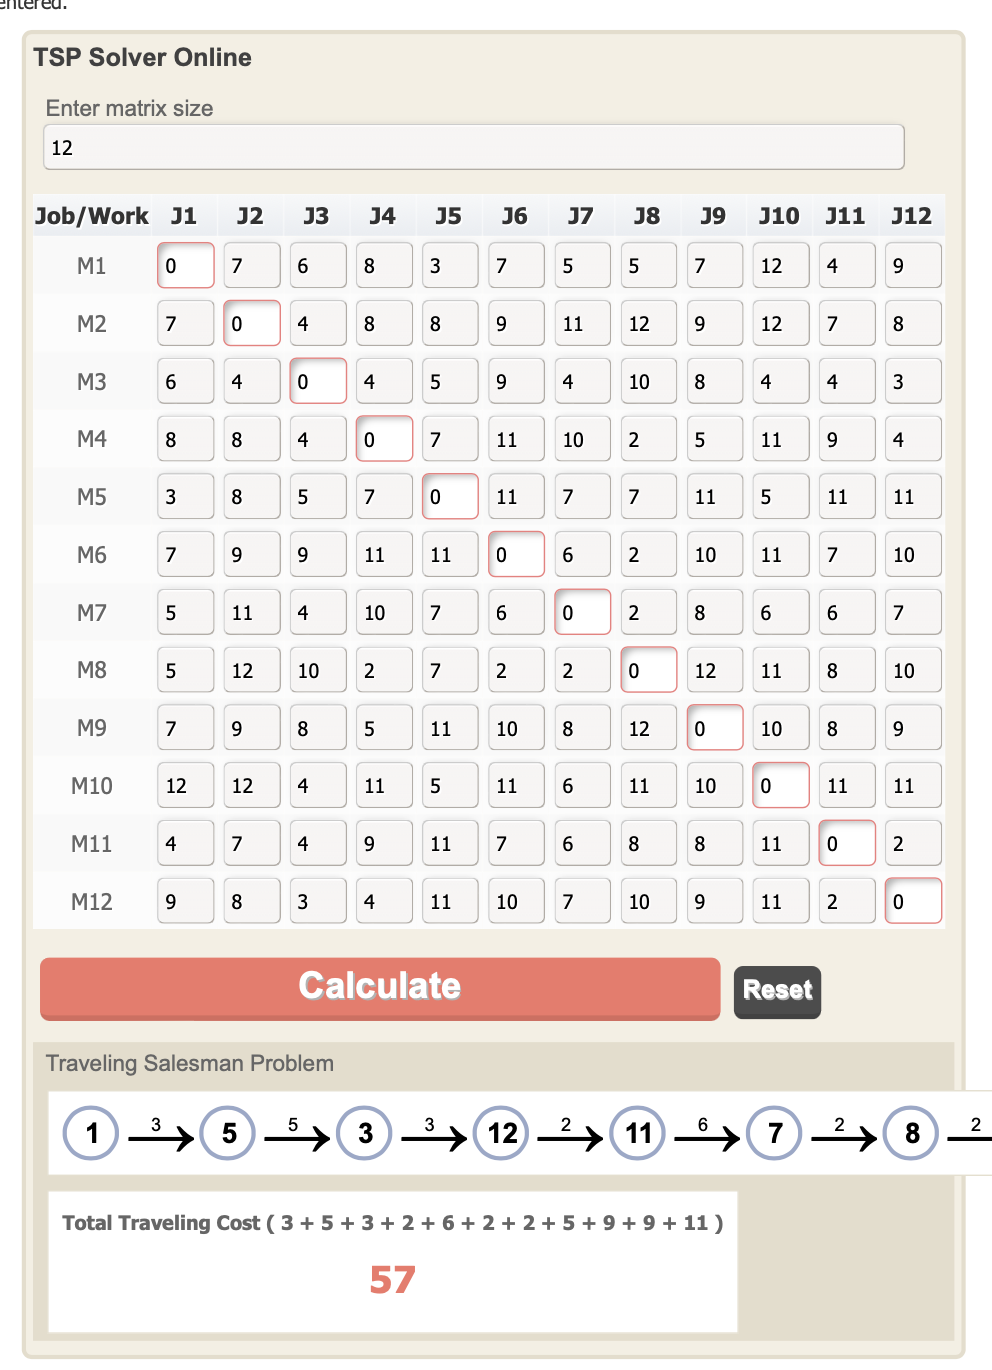

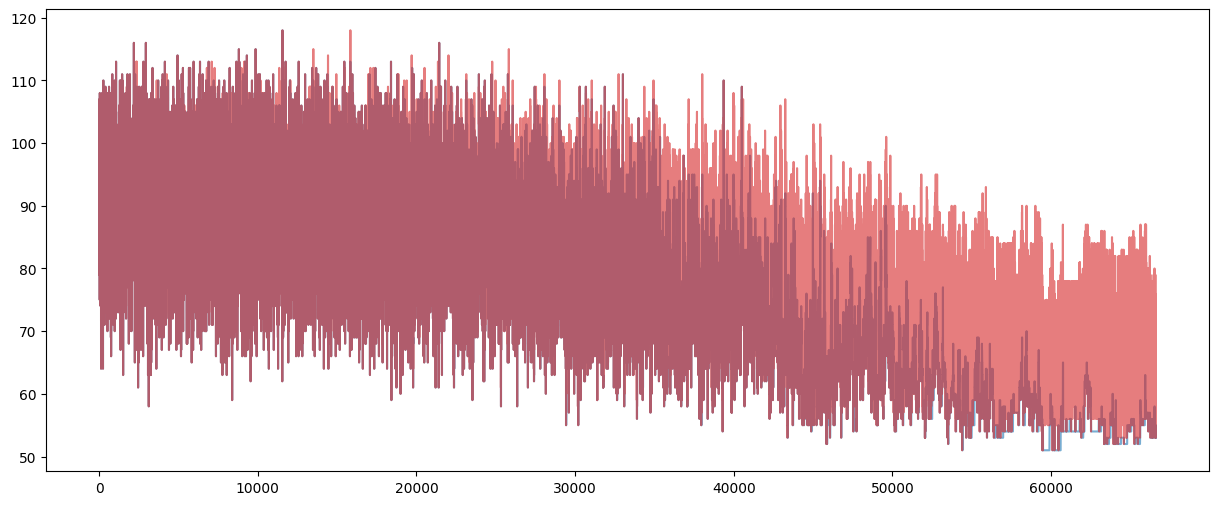

In [221]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (15,6))
ax.plot(range(len(old_cost_list)),old_cost_list, color = 'tab:blue', alpha = 0.6)
ax.plot(range(len(new_cost_list)),new_cost_list, color = 'tab:red', alpha = 0.6)

plt.show()
plt.close()

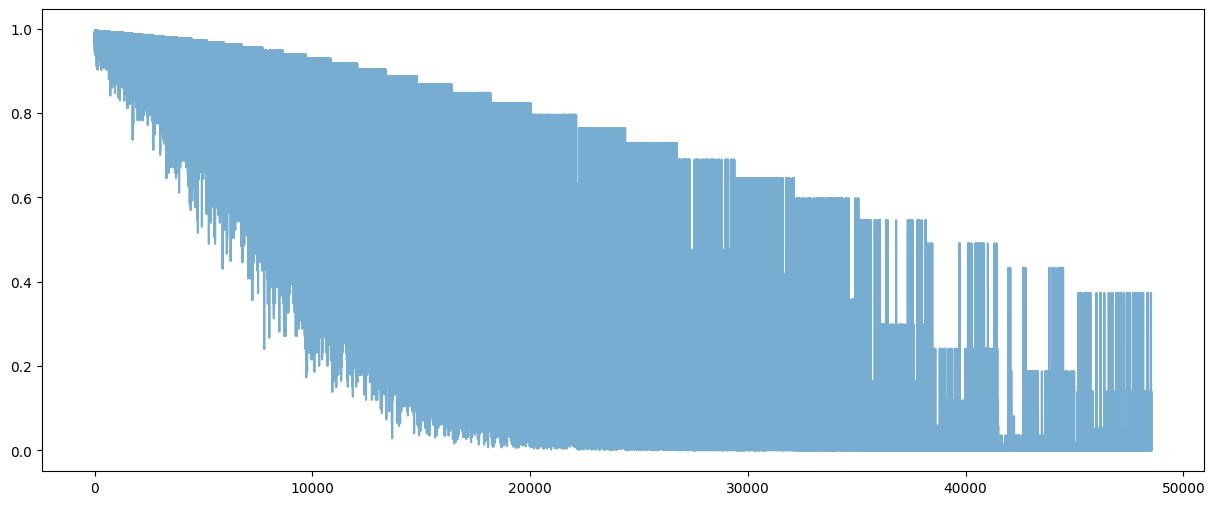

In [222]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (15,6))
ax.plot(range(len(p_list)),p_list, color = 'tab:blue', alpha = 0.6)

plt.show()
plt.close()